**First pass testing for the algorithm**

rcwsalg and zernike are libraries I wrote

In [1]:
import rcwsalg
import zernike
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Now, I try to compute representations of the images that we will see, using the transport of intensities equation:
\begin{equation}
   \frac{\partial I}{\partial z} = \frac{\lambda F \left(F-l\right)}{2\pi l} \left[\frac{\partial}{\partial n}\phi\left(\frac{F\overrightarrow{r}}{l}\right) \delta_c - \nabla^2 \phi\left(\frac{F\overrightarrow{r}}{l}\right)\right]
\end{equation}

Note that for my implementation, so far I am neglecting $\frac{\partial}{\partial n}\phi\left(\frac{F\overrightarrow{r}}{l}\right) \delta_c$, and I am setting the term $\frac{\lambda F \left(F-l\right)}{2\pi l} = 1$

To compute the laplacian on an image F, where $F(x,y)$ denotes the pixel value at $(x,y)$, I am doing the following operation
\begin{equation}
    \nabla^2 F(x,y) = F(x+1,y) + F(x-1,y) + F(x,y+1) + F(x,y-1) - 4F(x,y)
\end{equation}

Below, I generate images corrisponding to $\pm\frac{\partial I}{\partial z}$, for zernike modes 1-15

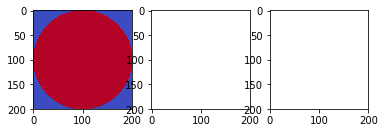

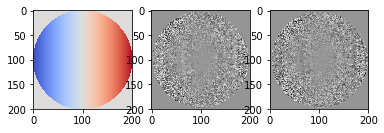

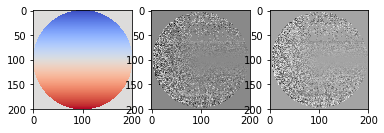

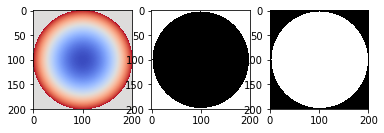

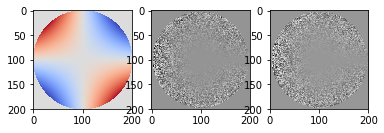

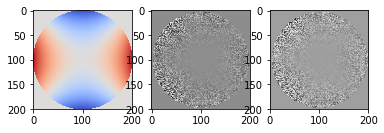

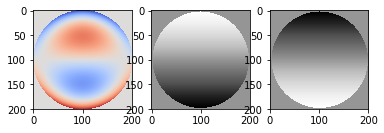

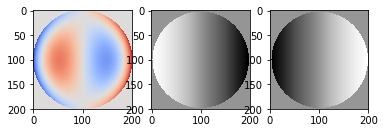

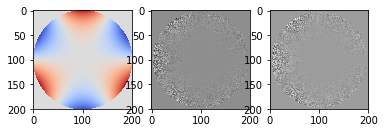

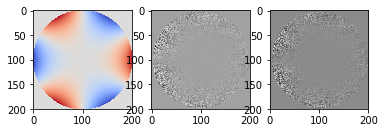

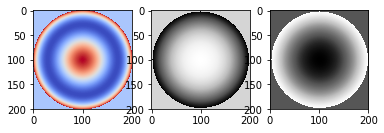

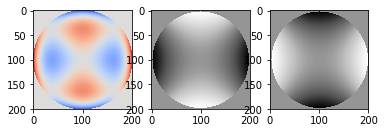

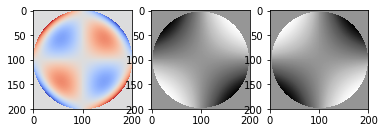

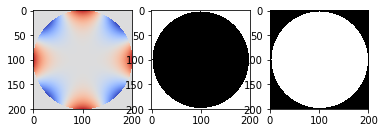

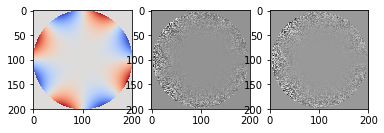

In [11]:
for i in range(15):
    coeff = [0]*i + [0.1] + [0]*(14-i)
    wavefront = zernike.generate_wavefront(coeff, 200, 200)
    im1, im2 = rcwsalg.computeImages(wavefront)
    
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(wavefront, cmap=cm.coolwarm)
    plt.subplot(1, 3, 2)
    plt.imshow(im1, cmap=cm.Greys)
    plt.subplot(1, 3, 3)
    plt.imshow(im2, cmap=cm.Greys)
    plt.show()

A close up view of the results for astigmatism are below. Note that it seems to just be random noise. The first set shows the laplacian in total, the set after shows the second derivatives in x and y computed seperately as
\begin{equation}
    \frac{\partial^2}{\partial^2 x}F(x,y) = F(x+1, y) + F(x-1, y) - 2F(x,y)
\end{equation}
\begin{equation}
    \frac{\partial^2}{\partial^2 y}F(x,y) = F(x, y+1) + F(x, y-1) - 2F(x,y)
\end{equation}

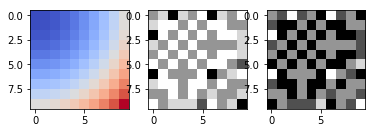

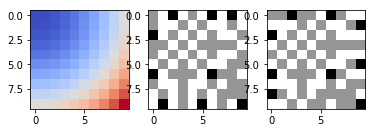

In [19]:
def sliceim(im):
    return [r[100:110] for r in im[100:110]]

coeff = [0,0,0,0.1]
wavefront = zernike.generate_wavefront(coeff, 200, 200)
im1, im2 = rcwsalg.computeImages(wavefront)
wavefront = sliceim(wavefront)
im1 = sliceim(im1)
im2 = sliceim(im2)
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(wavefront, cmap=cm.coolwarm)
plt.subplot(1, 3, 2)
plt.imshow(im1, cmap=cm.Greys)
plt.subplot(1, 3, 3)
plt.imshow(im2, cmap=cm.Greys)
plt.show()

wavefront = zernike.generate_wavefront(coeff, 200, 200)
im1, im2 = rcwsalg.computeImages(wavefront, givederivs = True)
wavefront = sliceim(wavefront)
im1 = sliceim(im1)
im2 = sliceim(im2)
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(wavefront, cmap=cm.coolwarm)
plt.subplot(1, 3, 2)
plt.imshow(im1, cmap=cm.Greys)
plt.subplot(1, 3, 3)
plt.imshow(im2, cmap=cm.Greys)
plt.show()

For trefoil, the second derivatives seem to cancel each other out

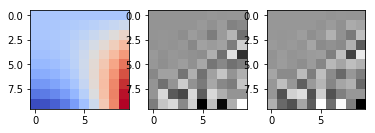

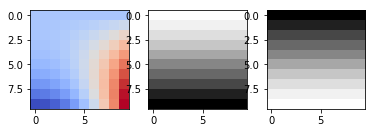

In [36]:
def sliceim(im):
    return [r[100:110] for r in im[100:110]]

coeff = [0,0,0,0,0,0,0,0,0.1]
wavefront = zernike.generate_wavefront(coeff, 200, 200)
im1, im2 = rcwsalg.computeImages(wavefront)
wavefront = sliceim(wavefront)
im1 = sliceim(im1)
im2 = sliceim(im2)
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(wavefront, cmap=cm.coolwarm)
plt.subplot(1, 3, 2)
plt.imshow(im1, cmap=cm.Greys)
plt.subplot(1, 3, 3)
plt.imshow(im2, cmap=cm.Greys)
plt.show()

wavefront = zernike.generate_wavefront(coeff, 200, 200)
im1, im2 = rcwsalg.computeImages(wavefront, givederivs = True)
wavefront = sliceim(wavefront)
im1 = sliceim(im1)
im2 = sliceim(im2)
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(wavefront, cmap=cm.coolwarm)
plt.subplot(1, 3, 2)
plt.imshow(im1, cmap=cm.Greys)
plt.subplot(1, 3, 3)
plt.imshow(im2, cmap=cm.Greys)
plt.show()

Below are all of the zernike modes and the computed second derivatives in x and y

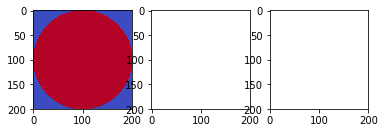

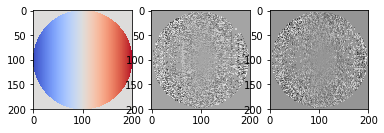

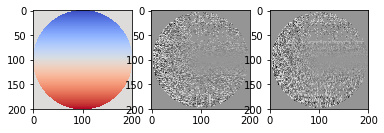

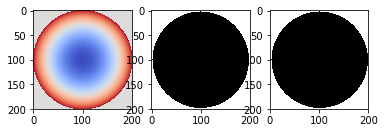

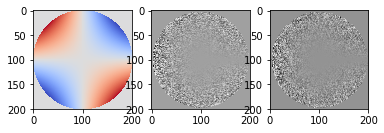

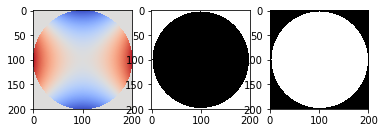

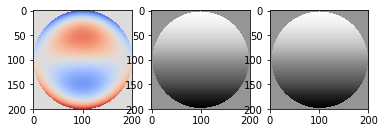

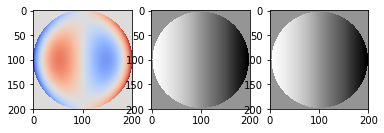

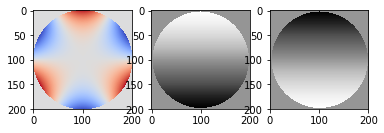

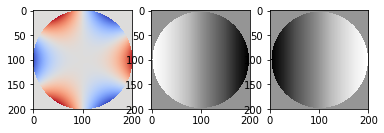

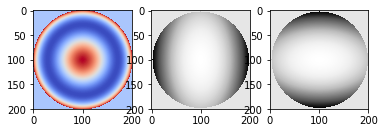

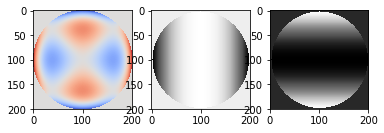

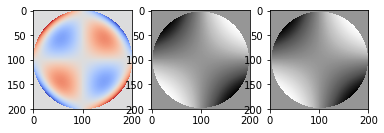

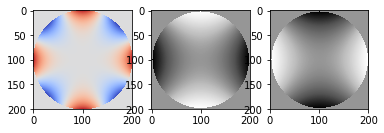

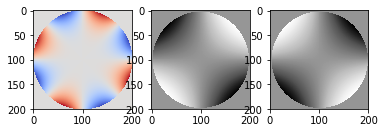

In [15]:
for i in range(15):
    coeff = [0]*i + [0.1] + [0]*(14-i)
    wavefront = zernike.generate_wavefront(coeff, 200, 200)
    im1, im2 = rcwsalg.computeImages(wavefront, givederivs = True)
    
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(wavefront, cmap=cm.coolwarm)
    plt.subplot(1, 3, 2)
    plt.imshow(im1, cmap=cm.Greys)
    plt.subplot(1, 3, 3)
    plt.imshow(im2, cmap=cm.Greys)
    plt.show()

Finally, just for kicks, here it is on a few random wavefronts

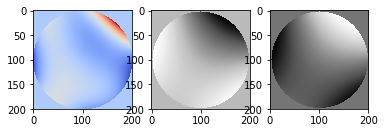

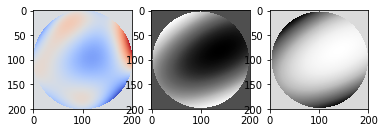

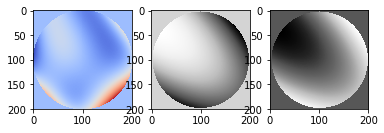

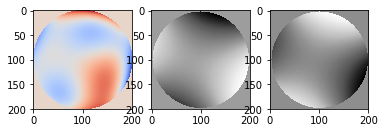

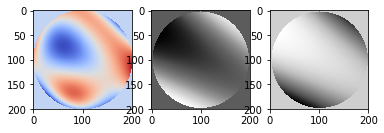

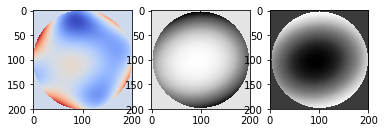

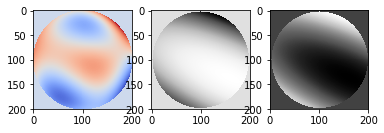

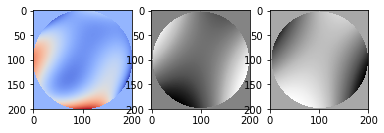

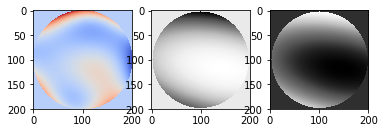

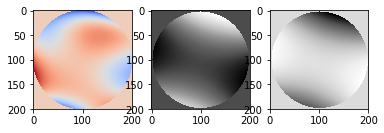

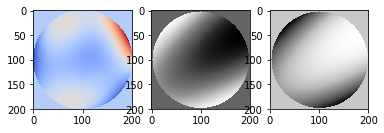

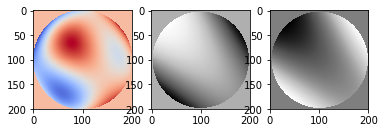

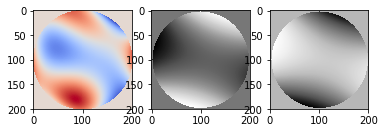

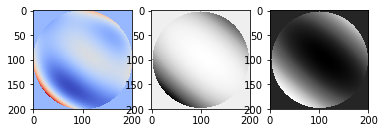

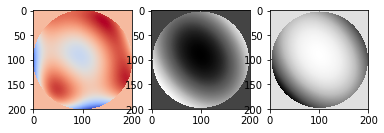

In [41]:
import random
random.seed(1254394)

for i in range(15):
    rand_coef = [random.random()-0.5 for i in range(15)]
    wavefront = zernike.generate_wavefront(rand_coef, 200, 200)
    im1, im2 = rcwsalg.computeImages(wavefront)

    plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(wavefront, cmap=cm.coolwarm)
    plt.subplot(1, 3, 2)
    plt.imshow(im1, cmap=cm.Greys)
    plt.subplot(1, 3, 3)
    plt.imshow(im2, cmap=cm.Greys)
    plt.show()